# Kmeans

eps=f(%messages)

Meilleur courbe:

tau=10 

delta = 1e-4 

nb_runs=2000 

Plies=[0.8,0.9] 

contrib_utile=10000 

Nbscramblers=[25,50] 

dmax=500


number_of_iterations=10\\

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


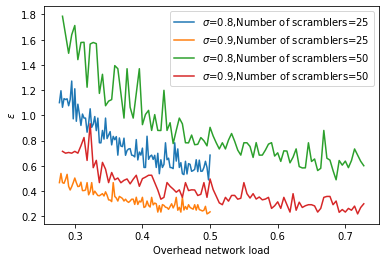

In [27]:
##################################################
%load_ext autoreload
%autoreload 2
from perf import *
from Theorical_functions import *
from Serialization import *

erase=False
tau=10
delta = 1e-4
nb_runs=10
Plies=[0.8,0.9]
contrib_utile=10000
Nbscramblers=[25,50]
dmax=3000

number_of_iterations=10


x_coordinates_dict = dict()
y_coordinates_dict=dict()
legend=dict()

name='epsilon_f(perf)-tradeoffs_KM,tau_{},delta_{},dmax_{},Plies_{},Nbscramblers_{},nb_runs_{},number_of_iterations_{}'.format(tau,delta,dmax,Plies,Nbscramblers,nb_runs,number_of_iterations)




if do_storage_exists(name+"1") and erase==False:
    y_coordinates_dict=restore(name+"1")
    x_coordinates_dict=restore(name+"2")
    
    for nb in Nbscramblers:
        for P in Plies:
            legend['P={},Nbscramblers={}'.format(P,nb)]="$\sigma$={},Number of scramblers={}".format(P,nb)

else:
    

    for nb in Nbscramblers:
        for P in Plies:
            y_coordinates_dict['P={},Nbscramblers={}'.format(P,nb)]=[]
            x_coordinates_dict['P={},Nbscramblers={}'.format(P,nb)]=[]
            legend['P={},Nbscramblers={}'.format(P,nb)]="$\sigma$={},Number of scramblers={}".format(P,nb)


    for d in range(10,dmax,10): 
        print("d=",d,end="\r",flush=True)
        for nb in Nbscramblers:
            for P in Plies:
                S_total=contrib_utile
                n=int(S_total/nb)
                y_coordinates_dict['P={},Nbscramblers={}'.format(P,nb)].append(number_of_iterations*get_epsilon_Semi_TH_optimized(tau,P,n,d,delta,nb_runs))
                x_coordinates_dict['P={},Nbscramblers={}'.format(P,nb)].append(number_of_messages_KM(tau,S_total,n,d,number_of_iterations)/(contrib_utile*(tau+1)*number_of_iterations))


    
    store(name+"1",y_coordinates_dict)
    store(name+"2",x_coordinates_dict)

     
            
for y_coordinates in y_coordinates_dict:
    plt.plot(x_coordinates_dict[y_coordinates], y_coordinates_dict[y_coordinates], label=legend[y_coordinates])
plt.legend()

"""plt.annotate('$\\varepsilon=1$', xy=(35000, 1), xytext=(35000, 1.1),
            arrowprops=dict(arrowstyle="->",
                            shrinkA=0, shrinkB=0,
                            connectionstyle="angle,angleA=0,angleB=45,rad=10"),
            )


X=[20000,45000]
Y=[1,1]
plt.plot(X, Y,'k--')
"""
plt.xlabel('Overhead network load')
plt.ylabel('$\\varepsilon$')

#plt.xlim(100, 500)
#plt.ylim(0, 2.2)

saveFig(name)
##################################################








    

eps=f(nb secure channels)

number_of_iterations=10

tau=10

delta = 1e-4

nb_runs=4000

Plies=[0.8,0.9]

contrib_utile=10000

rates=[0.4,0.8]

nmax=500


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


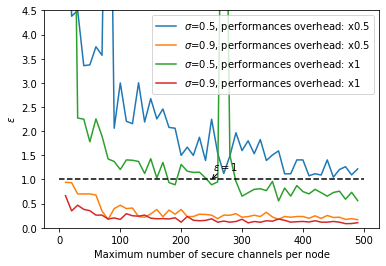

In [43]:
##################################################
%load_ext autoreload
%autoreload 2
from perf import *
from Theorical_functions import *
from Serialization import *

def allowed_d(tau,rate,sampling,n):
    
    d=int(n*((rate*(tau+1)-2-(tau/n))-1))
    return max(0,d)




number_of_iterations=10

erase=False
tau=10
delta = 1e-4
nb_runs=1
Plies=[0.5,0.9]
contrib_utile=10000
rates=[0.5,1]
nmax=500

x_coordinates_dict = dict()
y_coordinates_dict=dict()
legend=dict()

name='epsilon_f(perf_securechannels)-tradeoffs,tau_{},delta_{},nmax{},Plies_{},rates{},nb_runs_{}'.format(tau,delta,nmax,Plies,rates,nb_runs)



for rate in rates:
    for P in Plies:
        legend['P={},rate={}'.format(P,rate)]="$\sigma$={}, performances overhead: x{}".format(P,rate)

if do_storage_exists(name+"1") and erase==False:
    y_coordinates_dict=restore(name+"1")
    x_coordinates_dict=restore(name+"2")
    

else:
    

    for rate in rates:
        for P in Plies:
            y_coordinates_dict['P={},rate={}'.format(P,rate)]=[]
            x_coordinates_dict['P={},rate={}'.format(P,rate)]=[]


    for n in range(10,nmax,10): 
        print("n=",n,end="\r",flush=True)
        for rate in rates:
            for P in Plies:
                d=allowed_d(tau,rate,P,n)
                y_coordinates_dict['P={},rate={}'.format(P,rate)].append(number_of_iterations*get_epsilon_Semi_TH_optimized(tau,P,n,d,delta,nb_runs))
                x_coordinates_dict['P={},rate={}'.format(P,rate)].append(n)


    
    store(name+"1",y_coordinates_dict)
    store(name+"2",x_coordinates_dict)


           

for y_coordinates in y_coordinates_dict:
    plt.plot(x_coordinates_dict[y_coordinates], y_coordinates_dict[y_coordinates], label=legend[y_coordinates])
plt.legend()


plt.annotate('$\\varepsilon=1$', xy=(250, 1), xytext=(252, 1.2),
            arrowprops=dict(arrowstyle="->",
                            shrinkA=0, shrinkB=0,
                            connectionstyle="angle,angleA=0,angleB=45,rad=10"),
            )


X=[0,500]
Y=[1,1]
plt.plot(X, Y,'k--')

plt.xlabel('Maximum number of secure channels per node')
plt.ylabel('$\\varepsilon$')

#plt.xlim(100, 500)
plt.ylim(0, 4.5)

saveFig(name)
##################################################








    

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


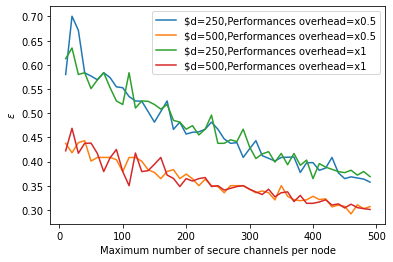

In [37]:
##################################################
%load_ext autoreload
%autoreload 2
from perf import *
from Theorical_functions import *
from Serialization import *



erase=False

tau=10
delta = 1e-4
nb_runs=100
ds=[250,500]
contrib_utile=10000
rates=[0.5,1]
nmax=500
number_of_iterations=10

x_coordinates_dict = dict()
y_coordinates_dict=dict()
legend=dict()




name='epsilon_f(perf_securechannels)-tradeoffs,tau_{},delta_{},nmax_{},ds{},rates{},nb_runs_{}'.format(tau,delta,nmax,ds,rates,nb_runs)


for rate in rates:
    for d in ds:
        legend['d={},rate={}'.format(d,rate)]="$d={},Performances overhead=x{}".format(d,rate)

if do_storage_exists(name+"1") and erase==False:
    y_coordinates_dict=restore(name+"1")
    x_coordinates_dict=restore(name+"2")
    


else:
    

    for rate in rates:
        for d in ds:
            y_coordinates_dict['d={},rate={}'.format(d,rate)]=[]
            x_coordinates_dict['d={},rate={}'.format(d,rate)]=[]


    for n in range(10,nmax,10): 
        print("n=",n,end="\r",flush=True)
        for rate in rates:
            for d in ds:
                P=0.9
                y_coordinates_dict['d={},rate={}'.format(d,rate)].append(number_of_iterations*get_epsilon_Semi_TH_optimized(tau,P,n,d,delta,nb_runs))
                x_coordinates_dict['d={},rate={}'.format(d,rate)].append(n)


    
    store(name+"1",y_coordinates_dict)
    store(name+"2",x_coordinates_dict)


           

for y_coordinates in y_coordinates_dict:
    plt.plot(x_coordinates_dict[y_coordinates], y_coordinates_dict[y_coordinates], label=legend[y_coordinates])
plt.legend()

"""plt.annotate('$\\varepsilon=1$', xy=(300, 1), xytext=(300, 1.2),
            arrowprops=dict(arrowstyle="->",
                            shrinkA=0, shrinkB=0,
                            connectionstyle="angle,angleA=0,angleB=45,rad=10"),
            )


X=[0,500]
Y=[1,1]
plt.plot(X, Y,'k--')
"""
plt.xlabel('Maximum number of secure channels per node')
plt.ylabel('$\\varepsilon$')

#plt.xlim(100, 500)
#plt.ylim(0, 2)

saveFig(name)
##################################################








    